In [21]:
import pandas as pd

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
df = pd.read_csv('gym_members_exercise_tracking_synthetic_data.csv')

In [24]:
df = pd.DataFrame({
     'Age': [25, 30, 35, 40, 45, 50],
    'BMI': [22.5, 24.0, 23.5, 30.0, 28.0, 26.5],
     'Workout_Frequency': [3, 5, 4, 2, 3, 4],
     'Experience_Level': [1, 2, 2, 1, 3, 2]   })

In [25]:
df.head()

,Age,BMI,Workout_Frequency,Experience_Level
0,25,22.5,3,1
1,30,24.0,5,2
2,35,23.5,4,2
3,40,30.0,2,1
4,45,28.0,3,3


In [26]:
# Check for missing values
print(df.isnull().sum())  

X = df[['Age', 'BMI', 'Workout_Frequency']]  
y = df['Experience_Level']  



Age                  0
BMI                  0
Workout_Frequency    0
Experience_Level     0
dtype: int64


In [27]:
# Split the dataset 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the resulting train and test sets
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (4, 3)
Test data shape: (2, 3)


In [28]:
#Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model 
model.fit(X_train, y_train)

# Print 
importances = model.feature_importances_
features = X.columns
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance:.4f}")


Age: 0.3399
BMI: 0.3964
Workout_Frequency: 0.2638


In [29]:
# Predicting
y_pred = model.predict(X_test)

print(f"Predicted Experience Levels: {y_pred}")


Predicted Experience Levels: [2 2]


In [30]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")

print(f"Classification Report:\n{class_report}")


Accuracy: 0.5000
Confusion Matrix:
[[0 1]
 [0 1]]
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/Users/chantelorimoloye/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chantelorimoloye/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chantelorimoloye/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

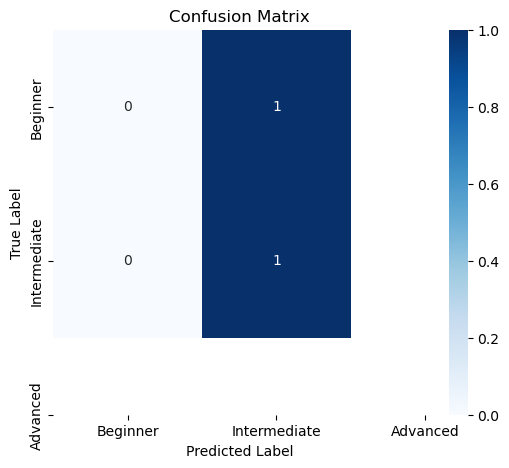

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test, y_pred)

# visualization
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Beginner', 'Intermediate', 'Advanced'], yticklabels=['Beginner', 'Intermediate', 'Advanced'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
